### Simulation study for Bayesian logistic regression example

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))  
sys.path.append(project_root)

import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
from logistic_regression.algorithms import pip_ula, sig, mypipla, mypgd, prox_pgd, proximal_map_laplace_iteration_total, proximal_map_laplace_iterative, proximal_map_laplace_approx, proximal_map_laplace_approx_total, pipgla
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

os.chdir(project_root)

#### Obtain synthetic dataset for Laplace prior case

The algorithm is tested on a toy example consisting of a Bayesian logistic regression task with Laplace prior for the covariates.

In [2]:
# Define the relative directory and filename
from scipy.stats import laplace, bernoulli
# Data and design matrix
np.random.seed(3)
design_matrix = np.random.uniform(low = -1.0, high = 1.0, size = (900, 50))
x_unknown = laplace.rvs(loc = -4, size = (50, 1))
parameter_bernoulli = sig(np.matmul(design_matrix, x_unknown))
data_experiment = bernoulli.rvs(np.array(parameter_bernoulli[:, 0]), size = 900)
labels = np.expand_dims(data_experiment, axis=1)
theta_true = -4

##### Moreau-Yosida PGD algorithm iteratively

100%|██████████| 5000/5000 [02:33<00:00, 32.50it/s] 


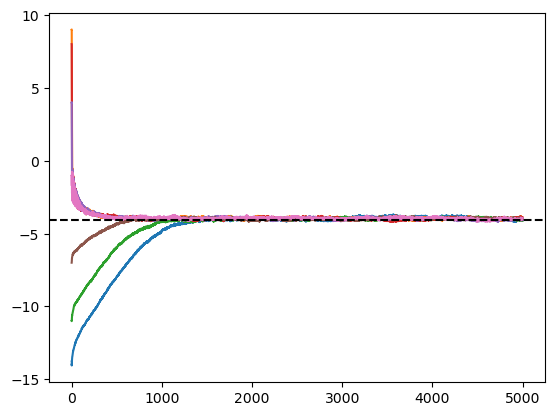

In [84]:
n_particles = 50
n_iterations = 5000

fig = plt.figure()

theta_ips = []
X_ips = []
for _ in range(7):
    theta0 = np.random.randint(-15, 10)
    X0 = np.random.normal(loc = theta0, size=(50, n_particles))
    thetas_approx, XX_approx = mypgd(proximal_map = proximal_map_laplace_iterative, th = np.array([[theta0]]), X = X0, N = n_particles, design_matrix = design_matrix, data = labels, K = n_iterations, gamma = 0.005, h = 0.05)
    theta_ips.append(thetas_approx)
    X_ips.append(XX_approx)
    plt.plot(thetas_approx)

plt.axhline(y=np.mean(x_unknown), color='black', linestyle='dashed')
plt.show()
fig.savefig('prox_pgd_iterative.pdf', format='pdf')

In [ ]:
list_map_estimate = []
list_rmse = []

for i in range(7):
    list_rmse.append((theta_ips[-1]-theta_true)**2/theta_true**2)

##### Moreau-Yosida PGD algorithm approximately

100%|██████████| 5000/5000 [02:12<00:00, 37.64it/s] 


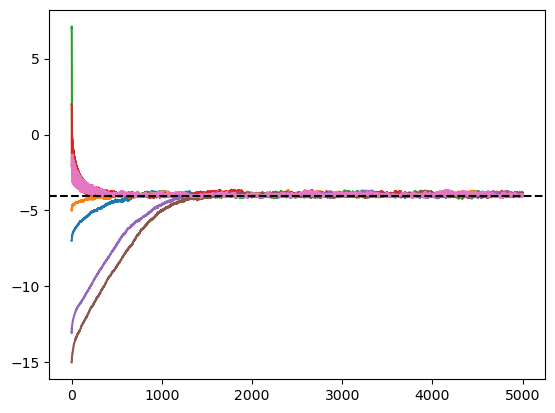

In [123]:
n_particles = 50
n_iterations = 5000

fig = plt.figure()

theta_ips = []
X_ips = []
for _ in range(7):
    theta0 = np.random.randint(-15, 10)
    X0 = np.random.normal(loc = theta0, size=(50, n_particles))
    thetas_approx, XX_approx = mypgd(proximal_map = proximal_map_laplace_approx, th = np.array([[theta0]]), X = X0, N = n_particles, design_matrix = design_matrix, data = labels, K = n_iterations, gamma = 0.25, h = 0.05)
    theta_ips.append(thetas_approx)
    X_ips.append(XX_approx)
    plt.plot(thetas_approx)

plt.axhline(y=np.mean(x_unknown), color='black', linestyle='dashed')
plt.show()

In [ ]:
list_map_estimate = []
list_rmse = []

for i in range(7):
    list_rmse.append((theta_ips[-1]-theta_true)**2/theta_true**2)

##### Moreau-Yosida IPLA iteratively

100%|██████████| 5000/5000 [02:05<00:00, 39.70it/s] 


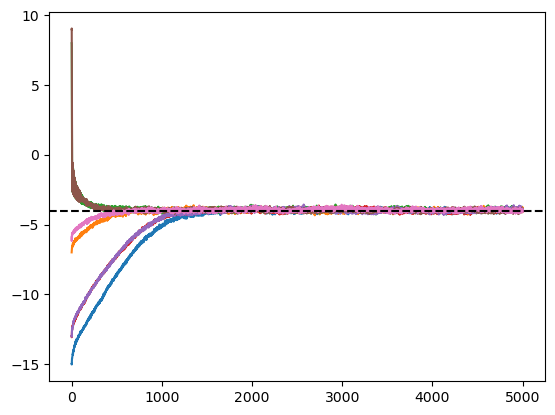

In [91]:
n_particles = 50
n_iterations = 5000

fig = plt.figure()

theta_ips = []
X_ips = []
for _ in range(7):
    theta0 = np.random.randint(-15, 10)
    X0 = np.random.normal(loc = theta0, size=(50, n_particles))
    thetas_approx, XX_approx = mypipla(proximal_map = proximal_map_laplace_iterative, th = np.array([[theta0]]), X = X0, N = n_particles, design_matrix = design_matrix, data = labels, K = n_iterations, gamma = 0.005, h = 0.05)
    theta_ips.append(thetas_approx)
    X_ips.append(XX_approx)
    plt.plot(thetas_approx)

plt.axhline(y=np.mean(x_unknown), color='black', linestyle='dashed')
plt.show()
fig.savefig('moreau_yosida_pipula_iterative.pdf', format='pdf')

In [ ]:
list_map_estimate = []
list_rmse = []

for i in range(7):
    list_rmse.append((theta_ips[-1]-theta_true)**2/theta_true**2)

##### Moreau-Yosida IPLA approximately

100%|██████████| 5000/5000 [01:40<00:00, 49.71it/s] 


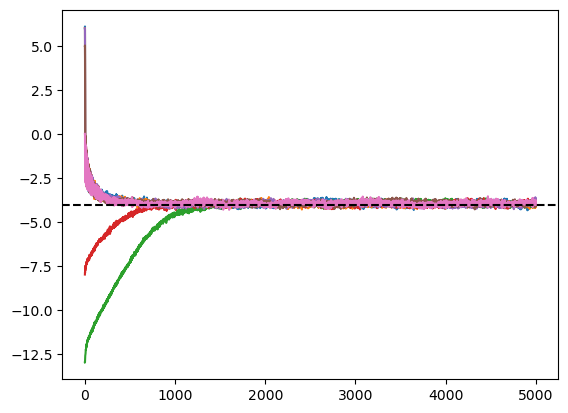

In [146]:
n_particles = 50
n_iterations = 5000

fig = plt.figure()

theta_ips = []
X_ips = []
for _ in range(7):
    theta0 = np.random.randint(-15, 10)
    X0 = np.random.normal(loc = theta0, size=(50, n_particles))
    thetas_approx, XX_approx = mypipla(proximal_map = proximal_map_laplace_approx, th = np.array([[theta0]]), X = X0, N = n_particles, design_matrix = design_matrix, data = labels, K = n_iterations, gamma = 0.35, h = 0.05)
    theta_ips.append(thetas_approx)
    X_ips.append(XX_approx)
    plt.plot(thetas_approx)

plt.axhline(y=np.mean(x_unknown), color='black', linestyle='dashed')
plt.show()

In [ ]:
list_map_estimate = []
list_rmse = []

for i in range(7):
    list_rmse.append((theta_ips[-1]-theta_true)**2/theta_true**2)